## Creating the Cross-Validation Split

This notebook was used to create the fixed cross-validation split found in `../data`. A fixed cross-validation split allows us to compare models fairly.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold

In [2]:
df_X = pd.read_csv("../data/raw/train_values.csv")
df_y = pd.read_csv("../data/raw/train_labels.csv")
df_raw = df_X.merge(df_y, on='building_id')  # Training features and labels. Will be split for validation.

## Create

We create a 5-way partition (mutually exclusive validation sets) of the training data.

In [3]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

In [4]:
# Verify that validation sets are mutually exclusive, and add up to whole training set.
indices = set()
for train_index, val_index in skf.split(df_raw.values, df_raw['damage_grade'].values):
    new_train_set = set(train_index)
    new_set = set(i for i in val_index)
    print('train indices exclusive of train indices: {}'.format(not bool(new_train_set & new_set)))
    print('new indices not yet in test indices: {}'.format(not bool(indices & new_set)))
    indices.update(new_set)
    print(len(indices))
print(len(df_raw.values))

train indices exclusive of train indices: True
new indices not yet in test indices: True
52121
train indices exclusive of train indices: True
new indices not yet in test indices: True
104242
train indices exclusive of train indices: True
new indices not yet in test indices: True
156363
train indices exclusive of train indices: True
new indices not yet in test indices: True
208483
train indices exclusive of train indices: True
new indices not yet in test indices: True
260601
260601


## Examine

Verify that the train/val splits are different, but have similar distributions. Verify that for each train/val split, the priors on the damage_grade are the same.

(208480, 40)
(52121, 40)
2.23827248134
1    39595
0    12526
Name: has_superstructure_mud_mortar_stone, dtype: int64


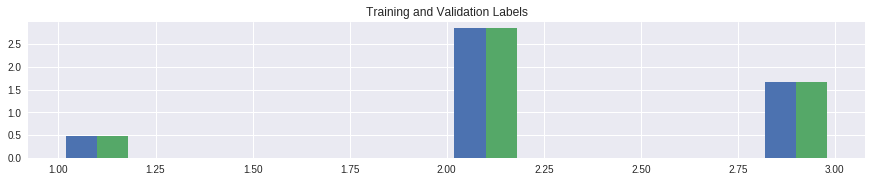

(208480, 40)
(52121, 40)
2.23827248134
1    39758
0    12363
Name: has_superstructure_mud_mortar_stone, dtype: int64


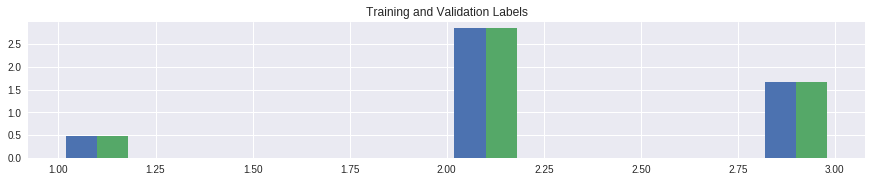

(208480, 40)
(52121, 40)
2.23827248134
1    39682
0    12439
Name: has_superstructure_mud_mortar_stone, dtype: int64


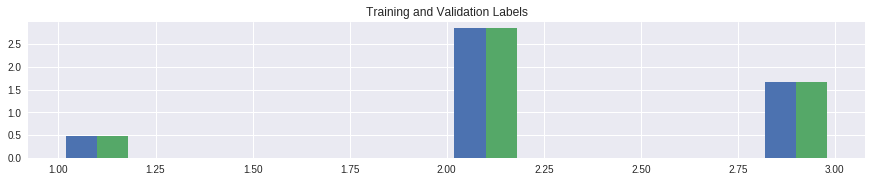

(208481, 40)
(52120, 40)
2.23825786646
1    39831
0    12289
Name: has_superstructure_mud_mortar_stone, dtype: int64


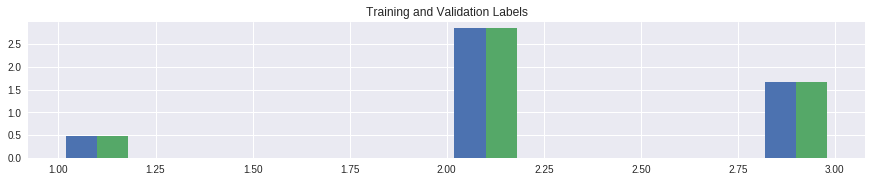

(208483, 40)
(52118, 40)
2.23828619671
1    39695
0    12423
Name: has_superstructure_mud_mortar_stone, dtype: int64


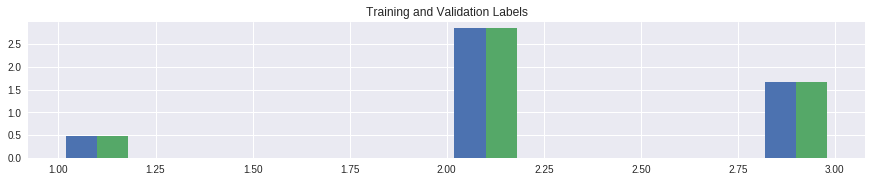

In [5]:
for train_index, val_index in skf.split(df_raw.values, df_raw['damage_grade'].values):
    df_raw_train = df_raw.loc[train_index]
    df_raw_val = df_raw.loc[val_index]
    print(df_raw_train.shape)
    print(df_raw_val.shape)
    print(df_raw_val['damage_grade'].mean())
    print(df_raw_val['has_superstructure_mud_mortar_stone'].value_counts())

    plt.figure(figsize=(15, 2.5))
    plt.hist([df_raw_train['damage_grade'].values, df_raw_val['damage_grade'].values], density=True)
    plt.title("Training and Validation Labels")
    plt.show()

## Export

In [6]:
!ls ../data/splits

In [7]:
for i, (train_index, val_index) in enumerate(skf.split(df_raw.values, df_raw['damage_grade'].values)):
    print(i)
    np.savetxt('../data/splits/train_{}.text.gz'.format(i), train_index)
    np.savetxt('../data/splits/valid_{}.text.gz'.format(i), val_index)

0
1
2
3
4


In [8]:
!ls ../data/splits

train_0.text.gz  train_3.text.gz  valid_1.text.gz  valid_4.text.gz
train_1.text.gz  train_4.text.gz  valid_2.text.gz
train_2.text.gz  valid_0.text.gz  valid_3.text.gz


## Import

Demonstration of how to import the splits.

(208480, 40)
(52121, 40)


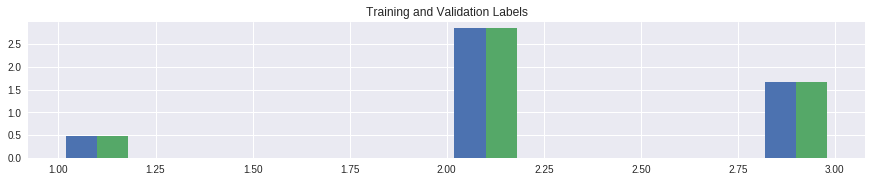

In [9]:
i = 0
train_index = np.loadtxt('../data/splits/train_{}.text.gz'.format(i))
val_index = np.loadtxt('../data/splits/valid_{}.text.gz'.format(i))

df_raw_train = df_raw.loc[train_index]
df_raw_val = df_raw.loc[val_index]
print(df_raw_train.shape)
print(df_raw_val.shape)

plt.figure(figsize=(15, 2.5))
plt.hist([df_raw_train['damage_grade'].values, df_raw_val['damage_grade'].values], density=True)
plt.title("Training and Validation Labels")
plt.show()